# Project N°4: Wrangle and Analyze Data
## Developed by David Singh Arjona

### Introduction

The dataset that I will be wrangling and analyzing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

So first things first, let's import some libraries:

In [7]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None
from scipy.stats import linregress
import matplotlib.colors as mcolors

# Data Wrangling
# Gather

Time to load (and bring from the internet) our files, here we will be working with three files:

* 'twitter-archive-enhanced.csv'
* 'image_predictions.tsv'
* 'tweet-json.txt'

The first file has been downloaded from the Udacity Classroom, the second file has been imported with the Requests library, and the third filee has been built from Twitter's API and the Tweepy library.

In [8]:
#Here we call our csv file
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
#Now we have to download the image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_req = requests.get(url, allow_redirects = True)
with open('image_predictions.tsv', 'wb') as file:
    file.write(image_req.content)

In [10]:
#Let's see what data we have in the 'image_predictions.tsv' file
df_image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Twitter's API and JSON

Here we got some help, the referenced site are the following:

* https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b7
* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

# IN THIS SECTION THE REVIEWER HAS TO TYPE THEIR OWN KEYS

In [11]:
#Accessing Twitter's API

CONSUMER_KEY = 
CONSUMER_SECRET = 
ACCESS_TOKEN = 
ACCESS_TOKEN_SECRET = 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True, 
                 parser = tweepy.parsers.JSONParser())

#Testing authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [12]:
#Now we have to download Tweepy status objects and append them
tweets = []
#Also we need to save not available tweets
tweets_not_available = []

for tweet_id in df_twitter_archive_enhanced.tweet_id:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_available.append(tweet_id)

Rate limit reached. Sleeping for: 502
Rate limit reached. Sleeping for: 465


In [13]:
#Appending the JSON in a list
listing = []
for json_tw in tweets:
    listing.append(json_tw)

In [14]:
#... and saving it as a txt file
with open('tweet_json_notusing.txt', 'w') as file:
    file.write(json.dumps(listing, indent = 4))

In [15]:
#Convert the JSON into a DataFrame, selecting the columns that may be interesting
listing2 = []
with open('tweet_json_notusing.txt', encoding = 'utf-8') as json_file:
    data = json.load(json_file)
    for dic in data:
        tw_id = dic['id']
        full_tw = dic['text']
        url1 = full_tw[full_tw.find('https'):]
        fav_counting = dic['favorite_count']
        rt_counting = dic['retweet_count']
        foll_counting = dic['user']['followers_count']
        fr_counting = dic['user']['friends_count']
        full_source = dic['source']
        device = full_source[full_source.find('rel="nofollow">') + 15:-4]
        source = device
        rt_status = dic['retweeted']
        if rt_status == False:
            rt_status = 'Original tweet'
            url = url1
        else:
            rt_status = 'This is a retweet'
            url = 'This is a retweet'
        listing2.append({'tweet_id': int(tw_id),
                        'favorite_count': int(fav_counting),
                        'retweet_count': int(rt_counting),
                        'followers_count': int(foll_counting),
                        'friends_count': int(fr_counting),
                        'url': url,
                        'source': source,
                        'retweeted_status': rt_status})
        #Now we convert the JSON data to a DataFrame
        json_tweet = pd.DataFrame(listing2, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                       'followers_count', 'friends_count','source', 
                                                       'retweeted_status', 'url'])

In [16]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


# It was suggested to me that the JSON tweet file that was just generated might be incomplete, so from now on we will be using the JSON file obtained from Udacity Classroom

In [17]:
with open ('tweet-json.txt') as file:
    data = [json.loads(line) for line in file] #List Comprehension
original_json_tweet = pd.DataFrame(data)
original_json_tweet.rename(columns = {'id': 'tweet_id'}, inplace = True)
#Here we renamed the 'id' column, so we will not have any problems during the merge

display(original_json_tweet.head())
display(original_json_tweet.info())

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

None

### That took a while, let's take a deep breathe for a minute
# Assess

In [18]:
#Let's see what columns are in our data sets
display(df_twitter_archive_enhanced.info())
display(df_image_pred.info())
display(original_json_tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

None

In [19]:
#Let's see what columns are in our data sets
display(df_twitter_archive_enhanced.head())
display(df_image_pred.head())
display(original_json_tweet.head())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


# Clean

Let's do a copy of our files:

In [20]:
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_image_pred_clean = df_image_pred.copy()
json_tweet_clean = original_json_tweet.copy()

So far, I have identified the next issues:

## Quality issues:

* Some datestamps indicates some tweets were posted after August 1st, 2017
* Possible presence of duplicated data
* Presence of retweets
* A lot of columns do not give useful information
* Several columns have naming issues
* 'tweet_id' column has an incorrect format
* Timestamp has an incorrect format
* A rating system can be created, but some rating numerator need to be fixed before

## Tidiness issues:
* Separate information must be merged.
* There are 4 columns that indicate dog_types, they can be merged into one
* A dog breed column can be created using the image prediction data

## These issues will be fixed in the next order:

1. Filter tweets in function of it's posting date (quality)
2. Check for duplicates (quality)
3. Erase retweets and response tweets (quality)
4. Merge the copies (tidiness)
5. Remove useless columns (quality)
6. Correct naming issues (quality)
7. Convert 'tweet_id' format from int to str (quality)
8. Create a column for dog types (tidiness)
9. Correct the timestamp format (quality)
10. Create a new standard for dog ratings (quality)
11. Create a breed columns using the image prediction data (tidiness)

## 1. Filter tweets in function of it's posting date

#### Define

* Remove tweets that were posted after August 1st, 2017

#### Code

In [21]:
#Now we filter tweets beyond August 1st, 2017
size1 = df_twitter_archive_enhanced_clean.shape[0]
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['timestamp'] <= '2017-08-01']
size2 = df_twitter_archive_enhanced_clean.shape[0]
print('{} tweets were filtered'.format(size1-size2)) #This lines checks how the Twitter Archive Enhanced file changed

2 tweets were filtered


#### Test

In [22]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['timestamp'] >= '2017-08-01']
#There is no data, so it worked

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 2. Check for duplicates.

#### Define

* Check for duplicates in the three data sets

In the JSON file, we will only consider the 'tweet_id' column to check for duplicates, because if we take the full dataset, Python detects a TypeError, unhashable type: 'list' and unhashable type: 'dict'.

#### Code (and Test)

In [23]:
#The .duplicated() method returns True if a row is duplicated, and False if it is not

display(df_twitter_archive_enhanced_clean.duplicated().value_counts())
display('There are a total of {} lines.'.format(df_twitter_archive_enhanced_clean.shape[0]))
display(df_image_pred_clean.duplicated().value_counts())
display('There are a total of {} lines.'.format(df_image_pred_clean.shape[0]))
display(json_tweet_clean['tweet_id'].duplicated().value_counts())
display('There are a total of {} lines.'.format(json_tweet_clean['tweet_id'].shape[0]))

#We only got False statements, so there were no duplicates

False    2354
dtype: int64

'There are a total of 2354 lines.'

False    2075
dtype: int64

'There are a total of 2075 lines.'

False    2354
Name: tweet_id, dtype: int64

'There are a total of 2354 lines.'

## 3. Erase retweets and response tweets.

#### Define

* Remove tweets with an 'existing' 'retweet_status_id'

Here, we will filter the retweeted tweets, by keeping 'retweeted_status_id' NaN values

#### Code

In [24]:
df_twitter_archive_enhanced_clean['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [25]:
size1 = df_twitter_archive_enhanced_clean.shape[0]
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[np.isnan(df_twitter_archive_enhanced_clean['retweeted_status_id'])]
size2 = df_twitter_archive_enhanced_clean.shape[0]
print('{} NaN tweets were filtered'.format(size1-size2)) #This lines checks how the Twitter Archive Enhanced file changed

181 NaN tweets were filtered


#### Test

In [26]:
df_twitter_archive_enhanced_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

181 tweets were filtered

## 4. Merge the copies.

#### Define

* Merge the three data sets in function of the 'id' columns

Here we got some help, the referenced site are the following:

* https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

#### Code

In [27]:
from functools import reduce
dfs = [df_twitter_archive_enhanced_clean, df_image_pred_clean ,json_tweet_clean]
df_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)
#The 'df_dogs' data set contains information from the three data set that we have been working with

In [28]:
print('Now our data set has {} rows!'.format(df_dogs.shape[0]))

Now our data set has 1992 rows!


#### Test

In [29]:
df_dogs.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,20562,False,False,False,False,en,NaN,NaN,NaN,NaN
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,12041,False,False,False,False,en,NaN,NaN,NaN,NaN


## 5. Remove useless columns

#### Define

* Remove columns that do not give much information and makes our data set look messy.

#### Code

In [30]:
df_dogs.columns #Here we see the columns that are contained in our data set

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_

In [31]:
columns_to_delete = ['in_reply_to_status_id_x','in_reply_to_user_id_x','source_x',
                     'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp',
                     'source_y','img_num','in_reply_to_status_id_y','in_reply_to_status_id_str',
                     'in_reply_to_user_id_y','in_reply_to_user_id_str','in_reply_to_screen_name',
                     'user','geo','coordinates','place', 'contributors','is_quote_status',
                     'favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable',
                     'lang', 'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status',
                     'full_text','truncated', 'display_text_range','entities','extended_entities','id_str',
                     'created_at']
df_dogs.drop(columns_to_delete,axis = 1, inplace=True)

#### Test

In [32]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1992 non-null   int64  
 1   timestamp           1992 non-null   object 
 2   text                1992 non-null   object 
 3   expanded_urls       1992 non-null   object 
 4   rating_numerator    1992 non-null   int64  
 5   rating_denominator  1992 non-null   int64  
 6   name                1992 non-null   object 
 7   doggo               1992 non-null   object 
 8   floofer             1992 non-null   object 
 9   pupper              1992 non-null   object 
 10  puppo               1992 non-null   object 
 11  jpg_url             1992 non-null   object 
 12  p1                  1992 non-null   object 
 13  p1_conf             1992 non-null   float64
 14  p1_dog              1992 non-null   bool   
 15  p2                  1992 non-null   object 
 16  p2_con

## 6. Correct naming issues.

#### Define

* Change one-character names to 'None' and change _ and lowercases to spaces and title format

#### Code

In [33]:
df_dogs['name'].value_counts()

None       546
a           55
Charlie     11
Lucy        10
Oliver      10
          ... 
Tino         1
Duchess      1
Pippin       1
Kevon        1
Eriq         1
Name: name, Length: 935, dtype: int64

In [34]:
df_dogs.name = df_dogs.name.str.replace('^[a-z]+', 'None') #Using 'regular expressions' we select names that correspond to one character
df_dogs['name'].value_counts()

None       644
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Mo           1
Tino         1
Duchess      1
Kevon        1
Eriq         1
Name: name, Length: 913, dtype: int64

In [35]:
#This section changes _ and lowercases to spaces and title format
cols = ['p1','p2','p3']
for i in range(df_dogs.shape[0]):
    df_dogs[cols[0]][i] = df_dogs[cols[0]][i].replace('_', ' ').title()
    df_dogs[cols[1]][i] = df_dogs[cols[1]][i].replace('_', ' ').title()
    df_dogs[cols[2]][i] = df_dogs[cols[2]][i].replace('_', ' ').title()

#### Test

In [36]:
df_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
1,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,3261,20562
4,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,2158,12041


In [37]:
df_dogs[cols]

,p1,p2,p3
0,Chihuahua,Malamute,Kelpie
1,Paper Towel,Labrador Retriever,Spatula
2,Basset,English Springer,German Short-Haired Pointer
3,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
4,Appenzeller,Border Collie,Ice Lolly
...,...,...,...
1987,Miniature Pinscher,Rottweiler,Doberman
1988,Rhodesian Ridgeback,Redbone,Miniature Pinscher
1989,German Shepherd,Malinois,Bloodhound
1990,Redbone,Miniature Pinscher,Rhodesian Ridgeback


## 7. Convert 'tweet_id' format from int to str.

#### Define

* Change 'tweet_id' format from int to str

#### Code

In [38]:
df_dogs['tweet_id'] = df_dogs['tweet_id'].astype(str)

#### Test

In [39]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1992 non-null   object 
 1   timestamp           1992 non-null   object 
 2   text                1992 non-null   object 
 3   expanded_urls       1992 non-null   object 
 4   rating_numerator    1992 non-null   int64  
 5   rating_denominator  1992 non-null   int64  
 6   name                1992 non-null   object 
 7   doggo               1992 non-null   object 
 8   floofer             1992 non-null   object 
 9   pupper              1992 non-null   object 
 10  puppo               1992 non-null   object 
 11  jpg_url             1992 non-null   object 
 12  p1                  1992 non-null   object 
 13  p1_conf             1992 non-null   float64
 14  p1_dog              1992 non-null   bool   
 15  p2                  1992 non-null   object 
 16  p2_con

## 8. Create a column for dog types.

#### Define

* Put the four columns that indicate 'dog types' into one

#### Code

In [40]:
df_dogs['dog_type'] = df_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')
# This code line takes every dog type from the four columns and puts them in the column 'dog_type'

#### Test

In [41]:
df_dogs['dog_type'].value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

## 9. Correct the timestamp format.

#### Define

* Change timestamp from str format to datetime format

#### Code

In [42]:
#This code line removes the timezone segment
df_dogs['timestamp'] = df_dogs['timestamp'].str.slice(start=0, stop=-6)
#This code line changes timestamp to datetime format
df_dogs['timestamp'] = pd.to_datetime(df_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")
df_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,NaN
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,NaN
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,NaN
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,3261,20562,NaN
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,...,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,2158,12041,NaN


#### Test

In [43]:
df_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,NaN
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,NaN
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,NaN
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,3261,20562,NaN
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,...,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,2158,12041,NaN


## 10. Create a new standard for dog ratings.

Here we got some help, the referenced site are the following:

* https://docs.python.org/3/library/re.html
* https://docs.python.org/3/howto/regex.html

#### Define

There are some numerators that correspond to float numbers, that may cause some troubles, so we need to fix it.

#### Code

In [44]:
display(df_dogs['text'].loc[0])
display(df_dogs['text'].loc[1])
display(df_dogs['text'].loc[2])

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'

In [45]:
df_dogs['rating_numerator'] = df_dogs['rating_numerator'].astype(float)
df_dogs['rating_denominator'] = df_dogs['rating_denominator'].astype(float)

In [46]:
import re

r_text = []
r_index = []
r_decimals = []

for i, text in df_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)): #This line looks specifically for numerators with decimal places and appends it in specific lists
        r_text.append(text) #The text
        r_index.append(i) #The index
        r_decimals.append(re.search('\d+\.\d+', text).group()) #The numerator/denominator expression

display(r_text)
display(r_index)
display(r_decimals)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

[37, 501, 551, 1372]

['13.5', '9.75', '11.27', '11.26']

In [47]:
for i in range(len(r_decimals)):
    df_dogs.loc[r_index[i],'rating_numerator'] = float(r_decimals[i]) #Here we convert the ratings to floats

In [48]:
df_dogs['rating'] = df_dogs['rating_numerator'] / df_dogs['rating_denominator'] #And here we create the 'rating' column

#### Test

In [49]:
df_dogs.loc[r_index[0]]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
p1                                                     Golden Retriever
p1_conf                                                        0

In [50]:
display(df_dogs.rating.describe())
display(df_dogs.rating.value_counts())

count    1992.00000
mean        1.16474
std         4.06634
min         0.00000
25%         1.00000
50%         1.10000
75%         1.20000
max       177.60000
Name: rating, dtype: float64

1.200000      454
1.000000      421
1.100000      402
1.300000      259
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
Name: rating, dtype: int64

## 11. Create a breed columns using the image prediction data.

Here we got some help, the referenced sites are the following:

* https://www.geeksforgeeks.org/pandas-dataframe-iterrows-function-in-python/
* https://www.w3resource.com/pandas/dataframe/dataframe-iterrows.php

#### Define

* Use 'p1', 'p2' and 'p3' and define the most probable dog breed

#### Code

In [51]:
df_dogs['dog_breed'] = 'None'

for i, row in df_dogs.iterrows():

    if row.p1_dog: #If row.p1_dog = True, the 'dog_breed' cell will be occupied by the dog_breed from 'p1'
        df_dogs['dog_breed'].at[i] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10: #If row.p2_dog = True, the 'dog_breed' cell will be occupied by the dog_breed from 'p2'
        df_dogs['dog_breed'].at[i] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10: #If row.p3_dog = True, the 'dog_breed' cell will be occupied by the dog_breed from 'p3'
        df_dogs['dog_breed'].at[i] = row.p3
    else:
        df_dogs['dog_breed'].at[i] = 'None'

#### Test

In [52]:
df_dogs['dog_breed'].value_counts()

None                  364
Golden Retriever      156
Labrador Retriever    107
Pembroke               94
Chihuahua              84
                     ... 
Irish Wolfhound         1
Entlebucher             1
Silky Terrier           1
Scotch Terrier          1
Clumber                 1
Name: dog_breed, Length: 114, dtype: int64

In [53]:
df_dogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type,rating,dog_breed
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,0.078253,True,Kelpie,0.031379,True,4328,25461,NaN,1.2,Chihuahua
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,0.168086,True,Spatula,0.040836,False,8964,42908,NaN,1.3,Labrador Retriever
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,NaN,1.2,Basset
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,...,0.116317,True,Indian Elephant,0.076902,False,3261,20562,NaN,1.3,Chesapeake Bay Retriever
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,...,0.199287,True,Ice Lolly,0.193548,False,2158,12041,NaN,1.3,Appenzeller


## Now, there are some columns that have no use:

In [54]:
df_dogs.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count', 'dog_type',
       'rating', 'dog_breed'],
      dtype='object')

In [55]:
columns = ['rating_numerator','rating_denominator','doggo','floofer','pupper','puppo','p1','p1_conf',
           'p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
df_dogs.drop(columns,axis = 1, inplace=True) #Here we drop the mentioned columns
df_dogs.head()


,tweet_id,timestamp,text,expanded_urls,name,jpg_url,retweet_count,favorite_count,dog_type,rating,dog_breed
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461,NaN,1.2,Chihuahua
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908,NaN,1.3,Labrador Retriever
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048,NaN,1.2,Basset
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,3261,20562,NaN,1.3,Chesapeake Bay Retriever
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,2158,12041,NaN,1.3,Appenzeller


In [56]:
#Saving our file
df_dogs.to_csv('twitter_archive_master.csv')

# Analyze
Some questions we might answer are:

1. What is the favorite vs retweet ratio? Do they follow a representative trend?
2. What are the most common dog breeds?
3. What are the most common dog types?
4. What are the most common names?
5. How many 'likes' have the most favorited tweets? When were they posted?
6. How many 'retweets' have the most retweeted tweets? When were they posted?
7. Which dogs have the highest ratings?

## 1. What is the favorite vs retweet ratio? Do they follow a representative trend?

2.3815524100861407 2290.455590043727 0.9134188194053743


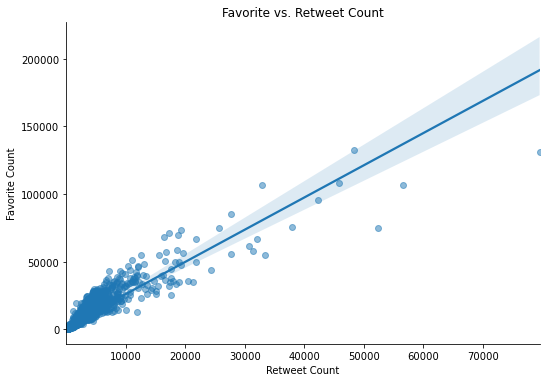

In [57]:
sns.lmplot(x='retweet_count', 
           y='favorite_count', 
           data=df_dogs,
           height = 5,
           aspect=1.5,
           scatter_kws={'alpha':0.5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');
slope, intercept, r, p, se = linregress(df_dogs['retweet_count'], df_dogs['favorite_count']) #This gives us the parameters of the linear regression
print(slope, intercept, r)

## 2. What are the most common dog breeds?

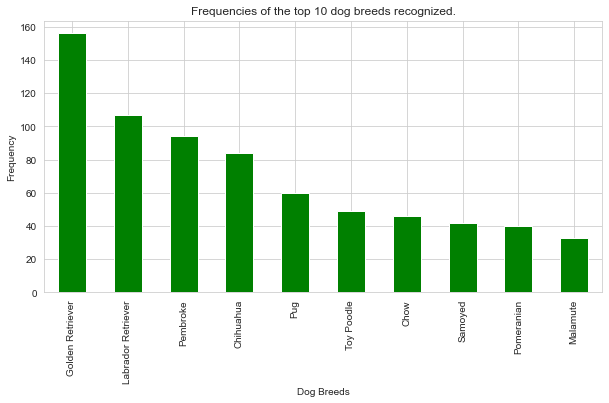

In [58]:
fig = plt.figure(figsize=(10,5)) 
sns.set_style('whitegrid')

df_dogs.dog_breed.value_counts(sort=True)[1:11].plot.bar(color = 'green')
plt.title('Frequencies of the top 10 dog breeds recognized.')
plt.xlabel('Dog Breeds')
plt.ylabel('Frequency');

In [59]:
df_dogs.dog_breed.value_counts(sort=True)

None                  364
Golden Retriever      156
Labrador Retriever    107
Pembroke               94
Chihuahua              84
                     ... 
Irish Wolfhound         1
Entlebucher             1
Silky Terrier           1
Scotch Terrier          1
Clumber                 1
Name: dog_breed, Length: 114, dtype: int64

## 3. What are the most common dog types?

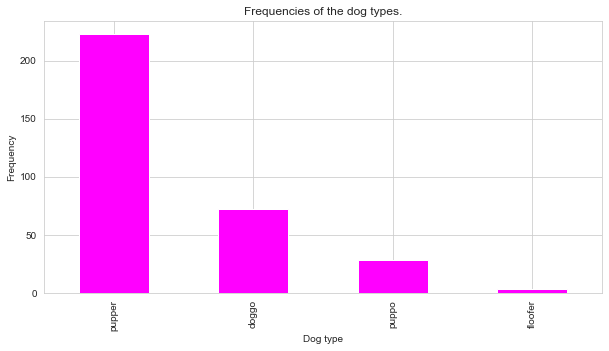

In [60]:
fig = plt.figure(figsize=(10,5)) 
sns.set_style('whitegrid')

df_dogs.dog_type.value_counts(sort=True).plot.bar(color = 'magenta')
plt.title('Frequencies of the dog types.')
plt.xlabel('Dog type')
plt.ylabel('Frequency');

In [61]:
df_dogs.dog_type.value_counts(sort=True)

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

## 4. What are the most common names?

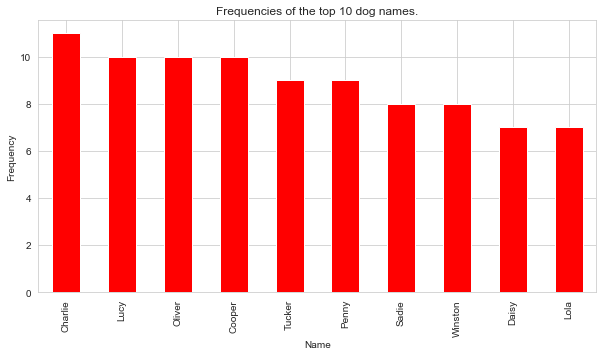

In [62]:
fig = plt.figure(figsize=(10,5)) 
sns.set_style('whitegrid')

df_dogs.name.value_counts(sort=True)[1:11].plot.bar(color = 'red')
plt.title('Frequencies of the top 10 dog names.')
plt.xlabel('Name')
plt.ylabel('Frequency');

In [63]:
df_dogs.name.value_counts(sort=True)

None       644
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Mo           1
Tino         1
Duchess      1
Kevon        1
Eriq         1
Name: name, Length: 913, dtype: int64

## 5. How many 'likes' have the most favorited tweets? When were they posted?

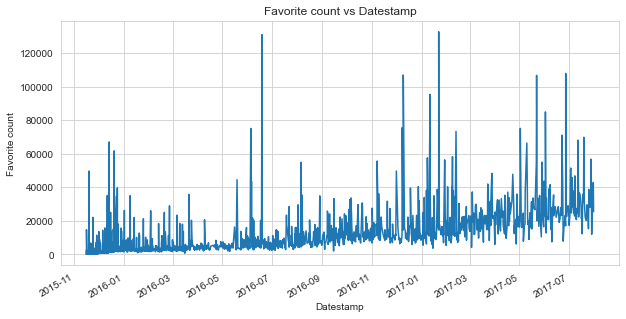

In [64]:
plt.figure(figsize=(10,5)) 
df_dogs.groupby('timestamp')['favorite_count'].mean().plot(kind='line')
plt.title('Favorite count vs Datestamp')
plt.xlabel('Datestamp')
plt.ylabel('Favorite count')
plt.show;

In [65]:
df_dogs.sort_values(by = 'favorite_count',ascending = False).head()

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,retweet_count,favorite_count,dog_type,rating,dog_breed
307,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,48265,132810,puppo,1.3,Lakeland Terrier
773,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,79515,131075,doggo,1.3,Labrador Retriever
56,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/87941...,45849,107956,NaN,1.3,English Springer
398,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,56625,107015,NaN,1.3,Chihuahua
106,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,32883,106827,pupper,1.3,French Bulldog


## 6. How many 'retweets' have the most retweeted tweets? When were they posted?

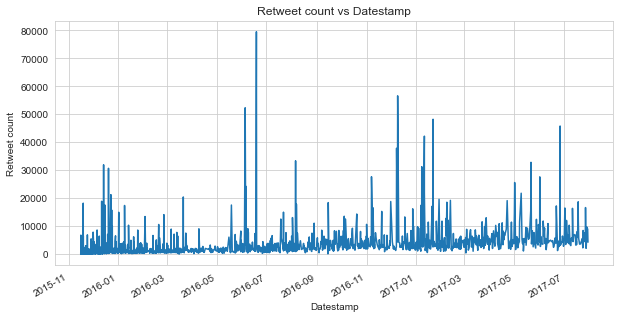

In [66]:
plt.figure(figsize=(10,5)) 
df_dogs.groupby('timestamp')['retweet_count'].mean().plot(kind='line')
plt.title('Retweet count vs Datestamp')
plt.xlabel('Datestamp')
plt.ylabel('Retweet count')
plt.show;

In [67]:
df_dogs.sort_values(by = 'retweet_count',ascending = False).head(3)

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,retweet_count,favorite_count,dog_type,rating,dog_breed
773,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,79515,131075,doggo,1.3,Labrador Retriever
398,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,56625,107015,NaN,1.3,Chihuahua
808,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,None,https://pbs.twimg.com/ext_tw_video_thumb/73923...,52360,75163,doggo,1.3,Eskimo Dog


## 7. Which dogs have the highest ratings?

In [68]:
df_dogs.sort_values(by = 'rating',ascending = False).head()

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,retweet_count,favorite_count,dog_type,rating,dog_breed
724,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,2772,5569,NaN,177.600000,None
1716,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,4324,7989,NaN,42.000000,None
383,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1655,5927,NaN,3.428571,Golden Retriever
163,851464819735769094,2017-04-10 16:00:07,This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/851464819...,Iggy,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,7855,25944,NaN,1.400000,None
144,856526610513747968,2017-04-24 15:13:52,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,None,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,2068,12446,NaN,1.400000,Old English Sheepdog
